Total dataset size: 1288 samples
Number of features (pixels): 1850
Number of classes (people): 7

Finding the best model using GridSearchCV...
Best estimator found by grid search: SVC(C=1000.0, class_weight='balanced', gamma=0.001)

Model Performance Metrics:
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.73      0.85      0.78        60
  Donald Rumsfeld       0.74      0.63      0.68        27
    George W Bush       0.90      0.90      0.90       146
Gerhard Schroeder       0.88      0.88      0.88        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.81      0.72      0.76        36

         accuracy                           0.82       322
        macro avg       0.77      0.74      0.75       322
     weighted avg       0.82      0.82      0.82       322



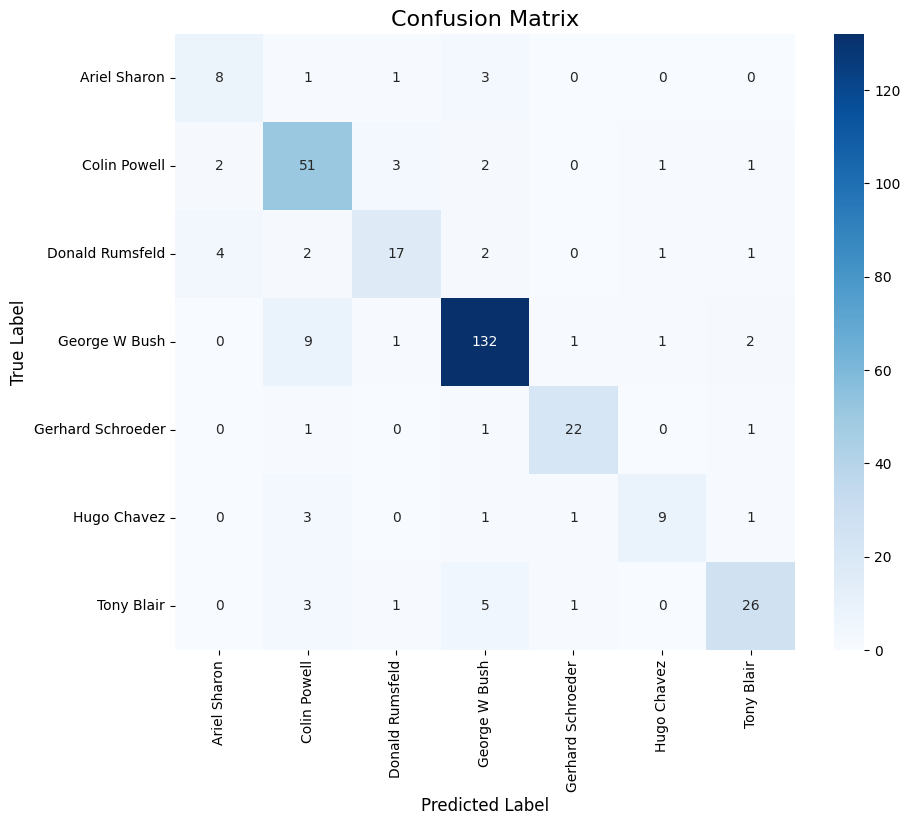

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# 1. Load Data (challenging dataset)
# Using faces with at least 70 images per person
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]
n_classes = len(lfw_people.target_names)
print(f"Total dataset size: {X.shape[0]} samples")
print(f"Number of features (pixels): {n_features}")
print(f"Number of classes (people): {n_classes}")

# 2. Preprocess with PCA
# Extracting the top 150 principal components
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)
X_pca = pca.transform(X)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42
)

# 4. Instantiate & Train Model with GridSearchCV
print("\nFinding the best model using GridSearchCV...")
param_grid = {
    'C': [1e3, 5e3, 1e4],
    'gamma': [0.0001, 0.0005, 0.001]
}
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5
)
clf = clf.fit(X_train, y_train)
print(f"Best estimator found by grid search: {clf.best_estimator_}")

# 5. Predict
y_pred = clf.predict(X_test)

# 6. Evaluate
print("\nModel Performance Metrics:")
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lfw_people.target_names, 
            yticklabels=lfw_people.target_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()